# Reference
- __[Replit](https://replit.com/@GarethDwyer1/cwr-07-juggling-with-pygame#main.py)__

In [104]:
import pygame
import random
from random import choice

# Define the size of the game window
WIDTH  = 1000
HEIGHT = 640

# Set the screen background color to black
BACKGROUND = (0, 0, 0)

class Ball:
    # Initialize a ball
    def __init__(self):
        self.image        = pygame.image.load("../Python/Input/tennis_ball.png")   # Load the ball image.
        # self.speed        = [random.randrange(-4, 4), 3]                          # Random horizontal speed; constant vertical speed.
        self.speed        = [choice([i for i in range(-4,4) if i != 0]), 3]        # Updated: exclude 0 (i.e. stationary) 
        self.rect         = self.image.get_rect()                                  # Get the rectangle bounds of the image for positioning.
        (w,_)             = self.image.get_size()                                  # Get the size of the image (width, height)
        self.rect.topleft = (random.randrange(0, WIDTH-w),10)                      # Updated: Position the ball randomly across the screen's width
        self.alive        = True                                                   # Track whether the ball is still active (not fallen off the screen).

    # Handles collisions with the screen edges
    def update(self):
        if self.rect.top < 0:                                              # Ball hits the top of the screen.
            self.speed[1] = -self.speed[1]                                    # Reverse vertical speed (bounce back).
            # self.speed[0] = random.randrange(-2, 2)                           # Slightly randomize horizontal speed.
            self.speed[0] = choice([i for i in range(-2,2) if i != 0])         # Updated: exclude 0 (i.e. stationary) 
        elif self.rect.left < 0 or self.rect.right > WIDTH:                # Ball hits left or right boundary.
            self.speed[0] = -self.speed[0]                                    # Reverse horizontal speed.
        elif self.rect.bottom > HEIGHT:                                    # Ball hits the bottom of the screen.
            self.alive = False                                                # Mark the ball as inactive.
        self.move()                                                        # Move the ball based on its speed.

    # Moves the ball by its current speed
    def move(self):
        self.rect = self.rect.move(self.speed)                             

# Game setup
def main():
    # fps, initialize pygame, window screen
    clock = pygame.time.Clock()                                            
    pygame.init()                                                          
    screen = pygame.display.set_mode((WIDTH, HEIGHT))                      

    # Initialize 3 initial balls
    ball1 = Ball()                                                         
    ball2 = Ball()
    ball3 = Ball()

    # Acitve balls list & ball clicks counter
    balls = [ball1, ball2, ball3]                                          
    num_successful_clicks = 0                                              

    # Game loop
    running = True
    while running:
        for event in pygame.event.get():
            # Quit game when 'X' is pressed
            if event.type == pygame.QUIT:
                running = False
            # Whenever mouse click hits a ball:
            #                                  > horizontal, vertical speed = randomize, reverse
            #                                  > increment throw counter by 1
            if event.type == pygame.MOUSEBUTTONDOWN:                          
                for ball in balls:                                              
                    if ball.rect.collidepoint(pygame.mouse.get_pos()):              
                        ball.speed[0] = random.randrange(-4, 4)                   
                        ball.speed[1] = -2                                            
                        num_successful_clicks += 1                                  
                        break                                                           
    
        # After 3 succesful clicks:
        #                          > Add a new ball
        #                          > Reset counter.
        if num_successful_clicks > 3:                                      
            ball = Ball()                                                  
            balls.append(ball)
            num_successful_clicks = 0                                      

        # Screen
        screen.fill(BACKGROUND)

        # For each ball, draw it, update it, delete it as game progresses
        for i, ball in enumerate(balls):                                   
            if ball.alive:                                                   
                screen.blit(ball.image, ball.rect)                              
                ball.update()                                                    
                if not ball.alive:                                               
                    del balls[i] 
        
        # Display update
        pygame.display.flip()                                             

        # frame per second set at desired rate
        clock.tick(60)                                                   
    
    # Quit pygame
    pygame.quit()
    
if __name__ == "__main__":
    main()

## Output

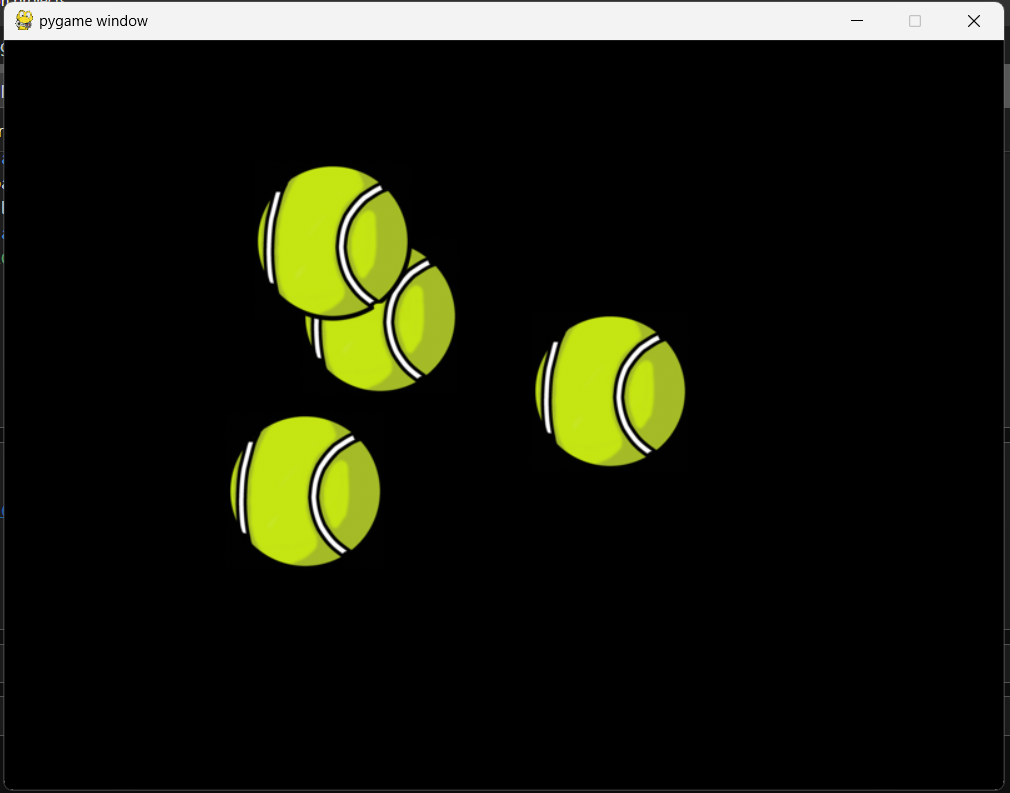

In [106]:
aa= pygame.image.load("../Python/Input/tennis_ball.png")

(_,h) = aa.get_size()
print(h)

(w,_) = aa.get_size()
print(w)

128
128
